In [1]:
!pip install GitPython
from git import Repo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 181 kB 29.4 MB/s 
     |████████████████████████████████| 63 kB 2.2 MB/s 


In [2]:
HTTPS_REMOTE_URL = 'https://github.com/Bsingstad/Heart-murmur-detection-2022-Simulab.git'
DEST_NAME = 'heart_murmurs'
cloned_repo = Repo.clone_from(HTTPS_REMOTE_URL, DEST_NAME)

In [3]:
!pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=02253d033c60476c11e2d477487ccaa7d14b6557b17fabd0f1a262877ba0a2e1
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json'

kaggle.json
/bin/bash: -c: line 0: unexpected EOF while looking for matching `''
/bin/bash: -c: line 1: syntax error: unexpected end of file


In [5]:
!kaggle datasets download -d bjoernjostein/the-circor-digiscope-phonocardiogram-dataset-v2

 99% 445M/449M [00:06<00:00, 130MB/s]
100% 449M/449M [00:06<00:00, 71.9MB/s]


In [6]:
import os, zipfile
try:
  os.mkdir("/content/data/")
except:
  print("data folder allready exists")

In [7]:
import os, zipfile

dir_name = "/content/"
target_dir = "/content/data/"
extension = ".zip"
 
os.chdir(dir_name) # change directory from working dir to dir with files

for item in os.listdir(dir_name): # loop through items in dir
    if item.endswith(extension): # check for ".zip" extension
        file_name = os.path.abspath(item) # get full path of files
        zip_ref = zipfile.ZipFile(file_name) # create zipfile object
        zip_ref.extractall(target_dir) # extract file to dir
        zip_ref.close() # close file
        os.remove(file_name) # delete zipped file

In [8]:
os.mknod("/content/heart_murmurs/__init__.py")

In [9]:
def replace_line(file_name, line_num, text):
    lines = open(file_name, 'r').readlines()
    lines[line_num] = text
    out = open(file_name, 'w')
    out.writelines(lines)
    out.close()

In [10]:
replace_line('/content/heart_murmurs/run_model.py',12,"from .helper_code import * \n")
replace_line('/content/heart_murmurs/run_model.py',13,"from .team_code import load_challenge_model, run_challenge_model \n")
replace_line('/content/heart_murmurs/cross_validate.py',15,"from .helper_code import * \n")
replace_line('/content/heart_murmurs/evaluate_model.py',16,"from .helper_code import load_patient_data, get_murmur, get_outcome, load_challenge_outputs, compare_strings \n")
replace_line('/content/heart_murmurs/cross_validate.py',16,"from .team_code import base_model, load_challenge_model, build_murmur_model, build_clinical_model, scheduler, scheduler_2, get_murmur_locations, pad_array, calculating_class_weights \n")
replace_line('/content/heart_murmurs/team_code.py',11,"from .helper_code import * \n")
replace_line('/content/heart_murmurs/train_model.py',11,"from .helper_code import is_integer \n")
replace_line('/content/heart_murmurs/train_model.py',12,"from .team_code import train_challenge_model \n")


In [11]:
%load_ext autoreload
%autoreload
%reload_ext autoreload

In [12]:
from heart_murmurs.helper_code import *

# have to add a "." in from of the module imports (in the scrips:train_model, run_model and team_code )
from heart_murmurs.train_model import *
from heart_murmurs.run_model import *
from heart_murmurs.team_code import *
from heart_murmurs.evaluate_model import *
from heart_murmurs.cross_validate import *

In [13]:
try:
  os.mkdir("/content/models/")
except:
  print("model folder allreadu exists")

In [14]:
try:
  os.mkdir("/content/results/")
except:
  print("results folder allreadu exists")

In [15]:
FOLDS = 5

In [ ]:
murmur_model, clinical_model, murmur_probas, outcome_probas, murmur_trues, outcome_trues, murmur_history, clinical_history, val_data, val_patient_labels, val_murmur_patient_clf_cv, val_outcome_patient_clf_cv = cv_challenge_model(data_folder="/content/data/training_data/training_data/", result_folder="/content/results/", n_epochs_1=25,n_epochs_2=25, n_folds=FOLDS, pre_train=False)

100%|██████████| 628/628 [00:12<00:00, 51.97it/s]


Number of signals in training data = 2156
Murmurs prevalence:
Present = 387, Unknown = 117, Absent = 1652
Outcomes prevalence:
Abnormal = 1039, Normal = 1117


100%|██████████| 314/314 [00:07<00:00, 39.59it/s]


Number of signals in validation data = 1007
Murmurs prevalence:
Present = 229, Unknown = 39, Absent = 739
Outcomes prevalence:
Abnormal = 492, Normal = 515
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)


INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)


Train murmur model..
Epoch 1/25
  6/108 [>.............................] - ETA: 36s - loss: 1.4830 - categorical_accuracy: 0.7417 - auc_7: 0.8171WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.1604s vs `on_train_batch_end` time: 0.1611s). Check your callbacks.


108/108 [==============================] - 51s 403ms/step - loss: 1.6262 - categorical_accuracy: 0.3660 - auc_7: 0.5727 - val_loss: 2.9565 - val_categorical_accuracy: 0.0497 - val_auc_7: 0.2538 - lr: 0.0010
Epoch 2/25
108/108 [==============================] - 42s 391ms/step - loss: 1.5068 - categorical_accuracy: 0.3590 - auc_7: 0.5908 - val_loss: 2.8850 - val_categorical_accuracy: 0.2284 - val_auc_7: 0.5457 - lr: 0.0010
Epoch 3/25
108/108 [==============================] - 42s 391ms/step - loss: 1.4657 - categorical_accuracy: 0.3738 - auc_7: 0.6130 - val_loss: 1.5429 - val_categorical_accuracy: 0.2105 - val_auc_7: 0.4581 - lr: 0.0010
Epoch 4/25
108/108 [==============================] - 42s 391ms/step - loss: 1.4445 - categorical_accuracy: 0.3465 - auc_7: 0.6043 - val_loss: 2.1160 - val_categorical_accuracy: 0.2175 - val_auc_7: 0.4308 - lr: 0.0010
Epoch 5/25
108/108 [==============================] - 42s 391ms/step - loss: 1.4504 - categorical_accuracy: 0.3724 - auc_7: 0.6230 - val_lo

100%|██████████| 628/628 [00:13<00:00, 45.51it/s]


Number of signals in training data = 2071
Murmurs prevalence:
Present = 445, Unknown = 96, Absent = 1530
Outcomes prevalence:
Abnormal = 999, Normal = 1072


100%|██████████| 314/314 [00:06<00:00, 46.08it/s]

Number of signals in validation data = 1092
Murmurs prevalence:
Present = 171, Unknown = 60, Absent = 861
Outcomes prevalence:
Abnormal = 532, Normal = 560
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)



INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)


Train murmur model..
Epoch 1/25
104/104 [==============================] - 52s 416ms/step - loss: 1.6239 - categorical_accuracy: 0.3240 - auc_9: 0.5723 - val_loss: 2.0363 - val_categorical_accuracy: 0.1355 - val_auc_9: 0.2385 - lr: 0.0010
Epoch 2/25
104/104 [==============================] - 41s 397ms/step - loss: 1.5970 - categorical_accuracy: 0.3404 - auc_9: 0.5831 - val_loss: 1.0049 - val_categorical_accuracy: 0.2436 - val_auc_9: 0.5647 - lr: 0.0010
Epoch 3/25
104/104 [==============================] - 41s 396ms/step - loss: 1.5708 - categorical_accuracy: 0.3187 - auc_9: 0.5628 - val_loss: 1.1902 - val_categorical_accuracy: 0.3233 - val_auc_9: 0.4790 - lr: 0.0010
Epoch 4/25
104/104 [==============================] - 41s 395ms/step - loss: 1.5508 - categorical_accuracy: 0.4211 - auc_9: 0.6165 - val_loss: 1.5939 - val_categorical_accuracy: 0.1566 - val_auc_9: 0.5500 - lr: 0.0010
Epoch 5/25
104/104 [==============================] - 41s 396ms/step - loss: 1.5428 - categorical_accuracy:

104/104 [==============================] - 50s 415ms/step - loss: 0.6684 - binary_accuracy: 0.5505 - auc_8: 0.5541 - val_loss: 1.2279 - val_binary_accuracy: 0.4872 - val_auc_8: 0.5403 - lr: 0.0010
Epoch 2/25
104/104 [==============================] - 41s 396ms/step - loss: 0.6620 - binary_accuracy: 0.5563 - auc_8: 0.5678 - val_loss: 0.9139 - val_binary_accuracy: 0.4725 - val_auc_8: 0.5194 - lr: 0.0010
Epoch 3/25
104/104 [==============================] - 41s 395ms/step - loss: 0.6579 - binary_accuracy: 0.5577 - auc_8: 0.5850 - val_loss: 0.7536 - val_binary_accuracy: 0.4716 - val_auc_8: 0.4302 - lr: 0.0010
Epoch 4/25
104/104 [==============================] - 41s 395ms/step - loss: 0.6544 - binary_accuracy: 0.5678 - auc_8: 0.5939 - val_loss: 0.7220 - val_binary_accuracy: 0.4753 - val_auc_8: 0.5015 - lr: 0.0010
Epoch 5/25
104/104 [==============================] - 41s 395ms/step - loss: 0.6548 - binary_accuracy: 0.5606 - auc_8: 0.5905 - val_loss: 0.7249 - val_binary_accuracy: 0.5174 - va

100%|██████████| 628/628 [00:14<00:00, 44.24it/s]


Number of signals in training data = 2099
Murmurs prevalence:
Present = 400, Unknown = 99, Absent = 1600
Outcomes prevalence:
Abnormal = 1024, Normal = 1075


100%|██████████| 314/314 [00:05<00:00, 58.96it/s]

Number of signals in validation data = 1064
Murmurs prevalence:
Present = 216, Unknown = 57, Absent = 791
Outcomes prevalence:
Abnormal = 507, Normal = 557
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)



INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)


Train murmur model..
Epoch 1/25
105/105 [==============================] - 52s 414ms/step - loss: 1.5981 - categorical_accuracy: 0.2868 - auc_11: 0.5379 - val_loss: 4.5277 - val_categorical_accuracy: 0.2030 - val_auc_11: 0.4515 - lr: 0.0010
Epoch 2/25
105/105 [==============================] - 41s 395ms/step - loss: 1.5531 - categorical_accuracy: 0.3497 - auc_11: 0.5882 - val_loss: 1.1515 - val_categorical_accuracy: 0.4370 - val_auc_11: 0.6274 - lr: 0.0010
Epoch 3/25
105/105 [==============================] - 41s 395ms/step - loss: 1.5174 - categorical_accuracy: 0.3830 - auc_11: 0.6183 - val_loss: 0.9403 - val_categorical_accuracy: 0.4408 - val_auc_11: 0.6853 - lr: 0.0010
Epoch 4/25
105/105 [==============================] - 42s 396ms/step - loss: 1.4992 - categorical_accuracy: 0.3516 - auc_11: 0.5977 - val_loss: 0.9956 - val_categorical_accuracy: 0.4192 - val_auc_11: 0.6410 - lr: 0.0010
Epoch 5/25
105/105 [==============================] - 42s 397ms/step - loss: 1.5212 - categorical_a

105/105 [==============================] - 52s 415ms/step - loss: 0.6777 - binary_accuracy: 0.5331 - auc_10: 0.5455 - val_loss: 0.8218 - val_binary_accuracy: 0.4793 - val_auc_10: 0.5143 - lr: 0.0010
Epoch 2/25
105/105 [==============================] - 42s 396ms/step - loss: 0.6652 - binary_accuracy: 0.5536 - auc_10: 0.5721 - val_loss: 0.7275 - val_binary_accuracy: 0.5235 - val_auc_10: 0.4612 - lr: 0.0010
Epoch 3/25
105/105 [==============================] - 42s 396ms/step - loss: 0.6626 - binary_accuracy: 0.5665 - auc_10: 0.5709 - val_loss: 0.7038 - val_binary_accuracy: 0.5273 - val_auc_10: 0.5408 - lr: 0.0010
Epoch 4/25
105/105 [==============================] - 42s 398ms/step - loss: 0.6671 - binary_accuracy: 0.5598 - auc_10: 0.5650 - val_loss: 0.7770 - val_binary_accuracy: 0.5254 - val_auc_10: 0.5363 - lr: 0.0010
Epoch 5/25
105/105 [==============================] - 41s 395ms/step - loss: 0.6595 - binary_accuracy: 0.5703 - auc_10: 0.5966 - val_loss: 0.9834 - val_binary_accuracy: 0.

## Training curves


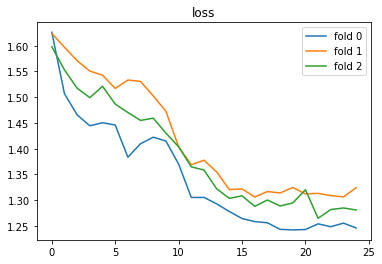

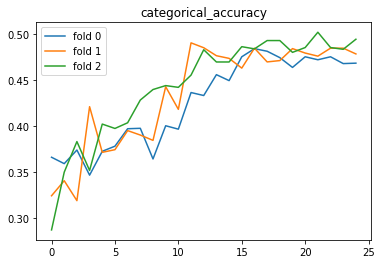

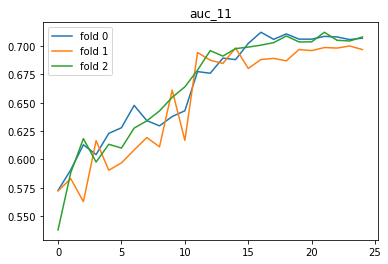

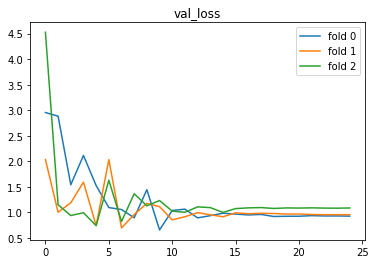

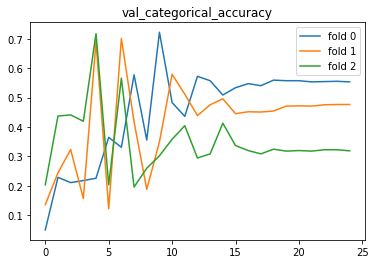

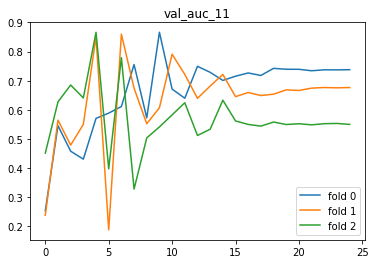

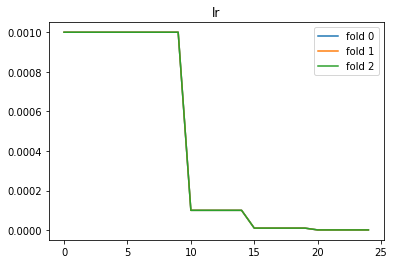

In [ ]:
import matplotlib.pyplot as plt

for key_idx in range(len(murmur_history[0].history.keys())):
  plt.figure()
  for cv_idx in range(len(murmur_history)):
    plt.title(list(murmur_history[cv_idx].history.keys())[key_idx])
    plt.plot(murmur_history[cv_idx].history[list(murmur_history[cv_idx].history.keys())[key_idx]], label="fold {}".format(cv_idx))
  plt.legend()
  plt.show()

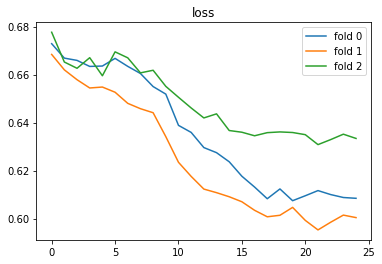

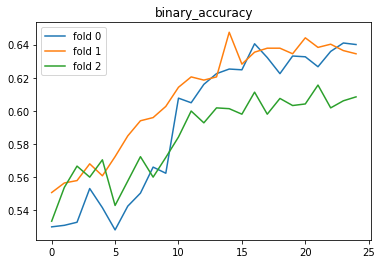

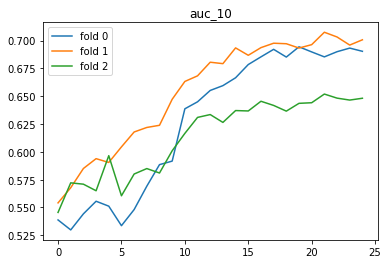

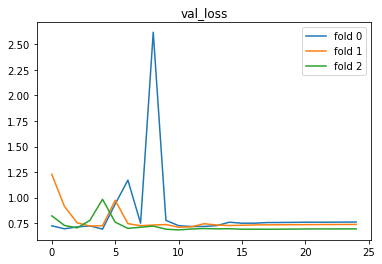

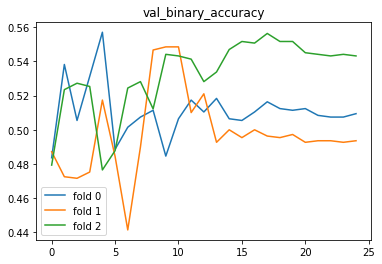

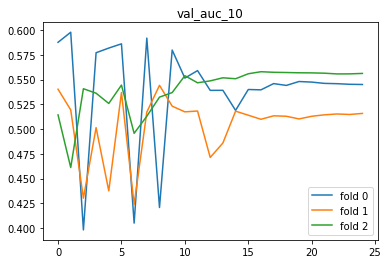

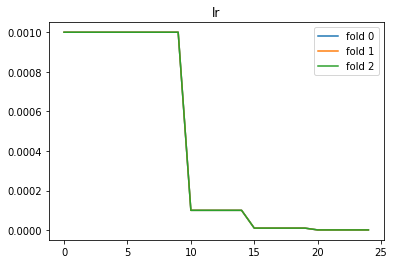

In [ ]:
for key_idx in range(len(clinical_history[0].history.keys())):
  plt.figure()
  for cv_idx in range(len(murmur_history)):
    plt.title(list(clinical_history[cv_idx].history.keys())[key_idx])
    plt.plot(clinical_history[cv_idx].history[list(clinical_history[cv_idx].history.keys())[key_idx]], label="fold {}".format(cv_idx))
  plt.legend()
  plt.show()

# Patientwise metrics

## murmurs

In [ ]:
murmur_classes = ['Present', 'Unknown', 'Absent']
outcome_classes = ['Abnormal', 'Normal']

In [ ]:
import numpy as np
for fold in range(FOLDS):
  murmur_pred = np.zeros((len(np.unique(val_patient_labels[fold])),3), dtype=np.int_)
  val_murmur_patient_clf_cv_ohe = np.zeros((val_murmur_patient_clf_cv[fold].shape[0],3))
  val_outcome_patient_clf_cv_ohe = np.zeros((val_outcome_patient_clf_cv[fold].shape[0],2))
  for pat_num in np.unique(val_patient_labels[fold]):
    pat_indx = np.where(val_patient_labels[fold] == pat_num)
    binary_pred = np.argmax(murmur_probas[fold][pat_indx],axis=1)
    murmur_indx = np.bincount(binary_pred).argmax()
    murmur_pred[pat_num,murmur_indx] = 1

    if val_murmur_patient_clf_cv[fold][pat_num] == "Present":
      val_murmur_patient_clf_cv_ohe[pat_num,0] = 1
    elif val_murmur_patient_clf_cv[fold][pat_num] == "Unknown":
      val_murmur_patient_clf_cv_ohe[pat_num,1] = 1
    elif val_murmur_patient_clf_cv[fold][pat_num] == "Absent":
      val_murmur_patient_clf_cv_ohe[pat_num,2] = 1


    if val_outcome_patient_clf_cv[fold][pat_num] == "Abnormal":
      val_outcome_patient_clf_cv_ohe[pat_num,0] = 1
    elif val_outcome_patient_clf_cv[fold][pat_num] == "Normal":
      val_outcome_patient_clf_cv_ohe[pat_num,1] = 1

  print("#################################")
  print("Murmur weighted accuracy:")
  print(compute_weighted_accuracy(val_murmur_patient_clf_cv_ohe, murmur_pred, murmur_classes))
  print("Challenge metric based on murmur:")
  print(compute_challenge_metric(val_outcome_patient_clf_cv_ohe, murmur_pred, outcome_classes, murmur_classes))
  print("Murmur Accuracy:")
  print(compute_accuracy(val_murmur_patient_clf_cv_ohe, murmur_pred))
  print("Murmur F measure:")
  print(compute_f_measure(val_murmur_patient_clf_cv_ohe, murmur_pred))
  print("#################################")




#################################
Murmur weighted accuracy:
0.5129449838187702
Challenge metric based on murmur:
13179.103838577634
Murmur Accuracy:
(0.5254777070063694, array([0.49253731, 0.55555556, 0.53275109]))
Murmur F measure:
(0.4314855581057991, array([0.46153846, 0.19417476, 0.63874346]))
#################################
#################################
Murmur weighted accuracy:
0.5144927536231884
Challenge metric based on murmur:
11865.365449015253
Murmur Accuracy:
(0.445859872611465, array([0.59574468, 0.64      , 0.39669421]))
Murmur F measure:
(0.3908123965948043, array([0.34782609, 0.28070175, 0.54390935]))
#################################
#################################
Murmur weighted accuracy:
0.41025641025641024
Challenge metric based on murmur:
12768.313136263561
Murmur Accuracy:
(0.27388535031847133, array([0.47692308, 0.92      , 0.14285714]))
Murmur F measure:
(0.2791994923343165, array([0.35028249, 0.24210526, 0.24521073]))
#################################


In [ ]:
import numpy as np
for fold in range(FOLDS):
  murmur_pred = np.zeros((len(np.unique(val_patient_labels[fold])),3), dtype=np.int_)
  val_murmur_patient_clf_cv_ohe = np.zeros((val_murmur_patient_clf_cv[fold].shape[0],3))
  val_outcome_patient_clf_cv_ohe = np.zeros((val_outcome_patient_clf_cv[fold].shape[0],2))
  for pat_num in np.unique(val_patient_labels[fold]):
    pat_indx = np.where(val_patient_labels[fold] == pat_num)
    binary_pred = np.argmax(murmur_probas[fold][pat_indx],axis=1)
    if 0 in binary_pred:
      murmur_pred[pat_num,0] = 1
    elif 2 in binary_pred:
      murmur_pred[pat_num,2] = 1
    elif 1 in binary_pred:
      murmur_pred[pat_num,1] = 1

    if val_murmur_patient_clf_cv[fold][pat_num] == "Present":
      val_murmur_patient_clf_cv_ohe[pat_num,0] = 1
    elif val_murmur_patient_clf_cv[fold][pat_num] == "Unknown":
      val_murmur_patient_clf_cv_ohe[pat_num,1] = 1
    elif val_murmur_patient_clf_cv[fold][pat_num] == "Absent":
      val_murmur_patient_clf_cv_ohe[pat_num,2] = 1


    if val_outcome_patient_clf_cv[fold][pat_num] == "Abnormal":
      val_outcome_patient_clf_cv_ohe[pat_num,0] = 1
    elif val_outcome_patient_clf_cv[fold][pat_num] == "Normal":
      val_outcome_patient_clf_cv_ohe[pat_num,1] = 1

  print("#################################")
  print("Murmur weighted accuracy:")
  print(compute_weighted_accuracy(val_murmur_patient_clf_cv_ohe, murmur_pred, murmur_classes))
  print("Challenge metric based on murmur:")
  print(compute_challenge_metric(val_outcome_patient_clf_cv_ohe, murmur_pred, outcome_classes, murmur_classes))
  print("Murmur Accuracy:")
  print(compute_accuracy(val_murmur_patient_clf_cv_ohe, murmur_pred))
  print("Murmur F measure:")
  print(compute_f_measure(val_murmur_patient_clf_cv_ohe, murmur_pred))
  print("#################################")




#################################
Murmur weighted accuracy:
0.5728155339805825
Challenge metric based on murmur:
13066.93035453682
Murmur Accuracy:
(0.5477707006369427, array([0.64179104, 0.27777778, 0.54148472]))
Murmur F measure:
(0.4261196277668356, array([0.45502646, 0.17241379, 0.65091864]))
#################################
#################################
Murmur weighted accuracy:
0.5597826086956522
Challenge metric based on murmur:
12851.670243385208
Murmur Accuracy:
(0.44904458598726116, array([0.74468085, 0.56      , 0.38016529]))
Murmur F measure:
(0.44220223535438813, array([0.32407407, 0.48275862, 0.51977401]))
#################################
#################################
Murmur weighted accuracy:
0.4951923076923077
Challenge metric based on murmur:
12016.599733733156
Murmur Accuracy:
(0.3471337579617834, array([0.64615385, 0.64      , 0.22767857]))
Murmur F measure:
(0.33688749815130503, array([0.36681223, 0.29090909, 0.35294118]))
#################################

In [ ]:
import numpy as np
for fold in range(FOLDS):
  murmur_pred = np.zeros((len(np.unique(val_patient_labels[fold])),3), dtype=np.int_)
  val_murmur_patient_clf_cv_ohe = np.zeros((val_murmur_patient_clf_cv[fold].shape[0],3))
  val_outcome_patient_clf_cv_ohe = np.zeros((val_outcome_patient_clf_cv[fold].shape[0],2))
  for pat_num in np.unique(val_patient_labels[fold]):
    pat_indx = np.where(val_patient_labels[fold] == pat_num)
    binary_pred = np.argmax(murmur_probas[fold][pat_indx],axis=1)
    if 0 in binary_pred:
      murmur_pred[pat_num,0] = 1
    elif 1 in binary_pred:
      murmur_pred[pat_num,1] = 1
    elif 2 in binary_pred:
      murmur_pred[pat_num,2] = 1

    if val_murmur_patient_clf_cv[fold][pat_num] == "Present":
      val_murmur_patient_clf_cv_ohe[pat_num,0] = 1
    elif val_murmur_patient_clf_cv[fold][pat_num] == "Unknown":
      val_murmur_patient_clf_cv_ohe[pat_num,1] = 1
    elif val_murmur_patient_clf_cv[fold][pat_num] == "Absent":
      val_murmur_patient_clf_cv_ohe[pat_num,2] = 1


    if val_outcome_patient_clf_cv[fold][pat_num] == "Abnormal":
      val_outcome_patient_clf_cv_ohe[pat_num,0] = 1
    elif val_outcome_patient_clf_cv[fold][pat_num] == "Normal":
      val_outcome_patient_clf_cv_ohe[pat_num,1] = 1

  print("#################################")
  print("Murmur weighted accuracy:")
  print(compute_weighted_accuracy(val_murmur_patient_clf_cv_ohe, murmur_pred, murmur_classes))
  print("Challenge metric based on murmur:")
  print(compute_challenge_metric(val_outcome_patient_clf_cv_ohe, murmur_pred, outcome_classes, murmur_classes))
  print("Murmur Accuracy:")
  print(compute_accuracy(val_murmur_patient_clf_cv_ohe, murmur_pred))
  print("Murmur F measure:")
  print(compute_f_measure(val_murmur_patient_clf_cv_ohe, murmur_pred))
  print("#################################")



#################################
Murmur weighted accuracy:
0.4919093851132686
Challenge metric based on murmur:
11959.88484436956
Murmur Accuracy:
(0.3503184713375796, array([0.64179104, 0.61111111, 0.24454148]))
Murmur F measure:
(0.3289170839895477, array([0.45502646, 0.15714286, 0.37458194]))
#################################
#################################
Murmur weighted accuracy:
0.483695652173913
Challenge metric based on murmur:
12077.58579712274
Murmur Accuracy:
(0.2898089171974522, array([0.74468085, 0.72      , 0.15702479]))
Murmur F measure:
(0.29229414548113736, array([0.32407407, 0.288     , 0.26480836]))
#################################
#################################
Murmur weighted accuracy:
0.44711538461538464
Challenge metric based on murmur:
14196.640172964111
Murmur Accuracy:
(0.2197452229299363, array([0.64615385, 0.84      , 0.02678571]))
Murmur F measure:
(0.22250228339229525, array([0.36681223, 0.24852071, 0.05217391]))
#################################


# Outcome

In [ ]:
import numpy as np
for fold in range(FOLDS):
  outcome_pred = np.zeros((len(np.unique(val_patient_labels[fold])),2), dtype=np.int_)
  val_murmur_patient_clf_cv_ohe = np.zeros((val_murmur_patient_clf_cv[fold].shape[0],3))
  val_outcome_patient_clf_cv_ohe = np.zeros((val_outcome_patient_clf_cv[fold].shape[0],2))
  for pat_num in np.unique(val_patient_labels[fold]):
    pat_indx = np.where(val_patient_labels[fold] == pat_num)
    binary_pred = (outcome_probas[fold][pat_indx]>0.5) * 1
    if 0 in binary_pred:
        outcome_pred[pat_num, 0] = 1
    else:
        outcome_pred[pat_num, 1] = 1

    if val_murmur_patient_clf_cv[fold][pat_num] == "Present":
      val_murmur_patient_clf_cv_ohe[pat_num,0] = 1
    elif val_murmur_patient_clf_cv[fold][pat_num] == "Unknown":
      val_murmur_patient_clf_cv_ohe[pat_num,1] = 1
    elif val_murmur_patient_clf_cv[fold][pat_num] == "Absent":
      val_murmur_patient_clf_cv_ohe[pat_num,2] = 1


    if val_outcome_patient_clf_cv[fold][pat_num] == "Abnormal":
      val_outcome_patient_clf_cv_ohe[pat_num,0] = 1
    elif val_outcome_patient_clf_cv[fold][pat_num] == "Normal":
      val_outcome_patient_clf_cv_ohe[pat_num,1] = 1

  print("#################################")
  print("Outcome weighted accuracy:")
  print(compute_weighted_accuracy(val_outcome_patient_clf_cv_ohe, outcome_pred, outcome_classes))
  print("Challenge metric based on outcome:")
  print(compute_challenge_metric(val_outcome_patient_clf_cv_ohe, outcome_pred, outcome_classes, outcome_classes))
  print("Outcome Accuracy:")
  print(compute_accuracy(val_outcome_patient_clf_cv_ohe, outcome_pred))
  print("Outcome F measure:")
  print(compute_f_measure(val_outcome_patient_clf_cv_ohe, outcome_pred))
  print("#################################")


#################################
Outcome weighted accuracy:
0.7364425162689805
Challenge metric based on outcome:
13520.439324209101
Outcome Accuracy:
(0.4681528662420382, array([0.875     , 0.08641975]))
Outcome F measure:
(0.37895422514360155, array([0.61431871, 0.14358974]))
#################################
#################################
Outcome weighted accuracy:
0.6637744034707158
Challenge metric based on outcome:
12973.767506865399
Outcome Accuracy:
(0.4713375796178344, array([0.76315789, 0.19753086]))
Outcome F measure:
(0.4305877212147695, array([0.58291457, 0.27826087]))
#################################
#################################
Outcome weighted accuracy:
0.7223427331887202
Challenge metric based on outcome:
12375.371060116919
Outcome Accuracy:
(0.5031847133757962, array([0.83552632, 0.19135802]))
Outcome F measure:
(0.4519579324233609, array([0.6195122 , 0.28440367]))
#################################
